### Задание №1 "Классификация с помощью многослойного перцептрона"

1. Найти набор данных для классификации, содержащий числовые данные (целевая переменная описывает принадлежность к 2 и более классам)
2. Построить классифицирующую нейронную сеть с помощью Tensorflow

> 2.1. Если необходимо, произвести нормирование / стандартизацию выходных данных

> 2.2. Если необходимо, произвести двоичное кодирование целевой переменной

> 2.3. Сделать разбивку на обучающий и тестовый наборы данных

> 2.4. Визуализировать метрики обучения

> 2.5. Получить метрики качества классификации для тестового набора

3. Подобрать наиболее оптимальную на Ваш взгляд структуру нейронной сети


In [2]:
from sklearn.datasets import load_wine
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from keras.models import Model, Sequential
from keras.layers import Input, Dense
import matplotlib.pyplot as plt


In [3]:
# Датасет с кагла про качество красного вина
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# Разделение на признаки и целевую переменную
data = df.drop('quality', axis=1).values 
target = df['quality'].values  

In [5]:
# нормирование входных данных: (x - min) / (max - min)
X = (data - np.min( data, axis = 0 )) / ( np.max( data, axis = 0 ) - np.min( data, axis = 0 ) )

In [6]:
ohe = OneHotEncoder(sparse_output=False)
Y = ohe.fit_transform(target.reshape(-1, 1))

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, random_state=42)

In [8]:
x = Input(shape=(11,))  # 11 признаков
l1 = Dense(8, activation="relu")(x)
out = Dense(6, activation="softmax")(l1)  # 6 нейронов = числу классов
nn = Model(x, out)

In [9]:
# Лучший результат показал именно "adam" а худшй "SGD"
nn.compile( optimizer = "adam", loss = "categorical_crossentropy", metrics = ["categorical_accuracy"] )

In [10]:
# Такой результат низкий результат из за малого количества данных в некоторых классах, но все равно он лучше чем случайное угадывание
hist = nn.fit( X_train, Y_train, epochs = 100, batch_size = 32 )

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - categorical_accuracy: 0.1085 - loss: 1.8147
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - categorical_accuracy: 0.3763 - loss: 1.6960
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - categorical_accuracy: 0.3966 - loss: 1.5990
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - categorical_accuracy: 0.4012 - loss: 1.5054
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - categorical_accuracy: 0.4541 - loss: 1.3641
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - categorical_accuracy: 0.5278 - loss: 1.3179
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - categorical_accuracy: 0.5602 - loss: 1.2463
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - categorical_accuracy: 0.5595 - loss: 1.2472
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - categorical_accuracy: 0.5570 - loss: 1.2018
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - categorical_accuracy: 0.5719 - loss: 1.1646
Epoch 11/

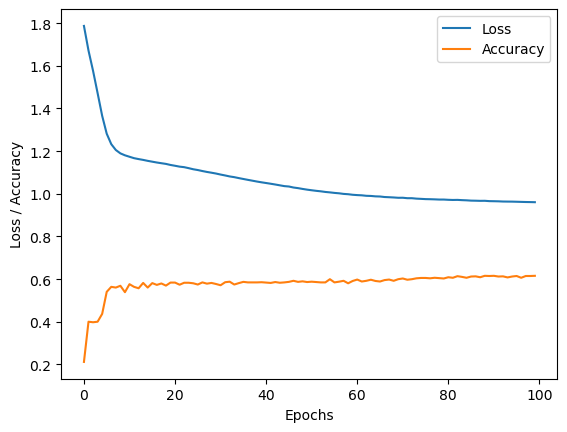

In [11]:
plt.plot( hist.history["loss"], label = "Loss" )
plt.plot( hist.history["categorical_accuracy"], label = "Accuracy" )
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.legend()
plt.show()

In [12]:
eval = nn.evaluate( X_test, Y_test )

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.5432 - loss: 0.9764 


In [13]:
y_pred = nn.predict( X_test )
y_pred

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[0.00857635, 0.0446411 , 0.6069064 , 0.31028944, 0.0263536 ,
        0.00323304],
       [0.00560984, 0.03201563, 0.7930502 , 0.15908852, 0.00902584,
        0.0012099 ],
       [0.00420446, 0.02434048, 0.4270212 , 0.50297725, 0.0389461 ,
        0.00251049],
       ...,
       [0.00690167, 0.04556776, 0.47719163, 0.4290642 , 0.03797464,
        0.00330011],
       [0.00966492, 0.05330454, 0.6081958 , 0.297313  , 0.02794081,
        0.00358102],
       [0.00844225, 0.01962431, 0.12194376, 0.45234436, 0.36490953,
        0.03273578]], dtype=float32)

In [14]:
yp = np.argmax( y_pred, axis = 1 )
yp

array([2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 4, 2, 2, 4, 2, 3, 2,
       3, 4, 2, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2,
       3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2,
       4, 2, 4, 2, 4, 2, 3, 3, 3, 2, 4, 3, 3, 3, 2, 4, 2, 3, 3, 3, 2, 3,
       3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2,
       4, 2, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2,
       2, 4, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3,
       3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3,
       3, 2, 2, 2, 2, 3, 2, 4, 2, 3, 3, 3, 4, 2, 3, 3, 3, 4, 3, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 4, 3, 2, 2, 3, 2,
       2, 3, 4, 3, 2, 2, 2, 4, 2, 2, 2, 2, 4, 3, 3, 3, 2, 3, 2, 2, 2, 2,
       3, 3, 2, 2, 3, 2, 4, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 4,
       3, 3, 2, 2, 3, 4, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 4, 2, 2, 2, 2, 3,
       2, 3, 2, 3, 2, 4, 2, 2, 2, 3, 2, 3, 3, 4, 2,

In [15]:
yt = np.argmax( Y_test, axis = 1 )
yt

array([3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 4, 0, 2, 2, 3, 4, 2, 4, 5, 2, 2, 3,
       2, 3, 3, 3, 4, 3, 2, 3, 2, 2, 3, 2, 3, 2, 4, 2, 1, 3, 2, 2, 4, 2,
       2, 3, 4, 3, 2, 3, 2, 2, 2, 4, 3, 3, 3, 2, 2, 2, 2, 4, 2, 3, 3, 2,
       3, 2, 3, 2, 3, 1, 3, 3, 3, 2, 5, 2, 3, 3, 2, 3, 2, 3, 3, 4, 2, 3,
       4, 1, 4, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 4, 3, 4, 3, 2, 3, 2,
       5, 2, 3, 2, 3, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2, 2, 3, 2,
       2, 2, 3, 2, 2, 2, 2, 3, 4, 3, 5, 2, 2, 2, 3, 3, 3, 2, 3, 4, 3, 2,
       3, 2, 2, 3, 3, 3, 4, 2, 4, 2, 2, 2, 3, 3, 2, 2, 3, 2, 4, 3, 4, 3,
       3, 2, 2, 3, 1, 3, 2, 4, 2, 2, 1, 2, 4, 3, 2, 3, 3, 4, 3, 2, 2, 3,
       2, 4, 2, 3, 3, 2, 4, 2, 2, 2, 3, 4, 4, 2, 2, 3, 3, 4, 3, 2, 3, 3,
       3, 3, 3, 4, 1, 2, 2, 4, 2, 2, 2, 2, 3, 3, 2, 4, 2, 3, 3, 3, 2, 1,
       3, 4, 3, 4, 2, 3, 3, 2, 2, 3, 2, 3, 1, 2, 3, 3, 2, 3, 3, 2, 2, 3,
       4, 4, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 4, 2, 2, 3, 2, 4,
       2, 3, 1, 3, 3, 5, 3, 2, 2, 3, 2, 4, 3, 3, 2,

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score( yt, yp )

0.56